# ME144, HW2
## February 26, 2021
## Luc Capaldi, Aidan Hamilton, Jeff Steinman 

Before submitting your **HTpy-HW2.ipynb** file, perform the following
* `Kernel>Restart & Run All`
* Make sure that there are no errors

In [2]:
from Libraries import thermodynamics as thermo
from Libraries import HT_thermal_resistance as res
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.constants as csts
import schemdraw as schem
import schemdraw.elements as e

ImportError: cannot import name 'Literal' from 'typing' (/usr/lib64/python3.7/typing.py)

## 1 Insulation

This problem is an expansion of PB 3 in `HTpy-HW2.ipynb`

Assuming that the outer surface temperature of the pipe is $150^\circ C$, find an insulation that works (i.e. an insulation that will not melt, for which you can find the price and thermal conductivity online). Derive the necessary equations that allow for determination of the different costs as a function of the thickness. Generate a plot for at least 3 different thicknesses.

Hint: Derive the heat loss for a variable thickness of insulation, then apply this formula for a range of thicknesses. Compare savings of gas vs cost of insulation.

### Solution
Assumptions:
* Heat transfer is steady and 1D
* All values are used as provided in the first part of this problem (file: 'HTpy-HW2')
* Use Phenolic foam insulation, which has a maximum temperature rating = 150 C (see reference 1)
* $k = 0.018\: \frac{W}{m\cdot K}$ (See reference 2)
* Insulation cost = 1100 dollars per $\text{ft}^3 \rightarrow$ 1 $m^3$ per 231.15 dollars (see reference 3)

References:
* 1. https://www.engineeringtoolbox.com/insulation-temperatures-d_922.html
* 2. http://www.epfa.org.uk/Pdfs/eng.pdf
* 3. https://www.uline.com/Product/Detail/S-788P/Foam/Foam-Roll-Perforated-1-8-24-x-550?pricode=WB3715&utm_source=Bing&utm_medium=pla&utm_term=S-788P&utm_campaign=Cushioning%2B%2F%2BFoam&utm_source=Bing&utm_medium=pla&utm_term=S-788P&utm_campaign=Cushioning%2B%2F%2BFoam&msclkid=c995ee743d6514536e538e5bd569faf4&gclid=c995ee743d6514536e538e5bd569faf4&gclsrc=3p.ds

The control volume is the insulation. The rate form of the conservation of energy statement is written as follows.
$$ \frac{1}{\eta} \left[\dot{E}_{in} - \dot{E}_{out}\right] = \dot{E}_{loss} $$

The energy transferred into the system due to heat losses at the pipe surface is $q$. The heat transfer out of the system is due to conduction through the insulation, and convection/radiation from the exposed insulation surface.

$$ \frac{1}{\eta} \left[q_{in} - q^{''}_{conv,out} - q^{''}_{rad,out} - q^{''}_{cond,out}\right] = \dot{E}_{loss} $$
$$ \frac{1}{\eta} \left[q - hA(T_s-T_\infty) - \sigma\varepsilon A(T_s^4-T_\infty^4) - k \frac{T_s - T_\infty}{L}\right]=\dot{E}_{loss} $$

The cost of heat losses per year is found as follows.
$$ C_{losses} = \dot{E}_{loss}*s_{year}*\text{cost} $$
where $s_{year}$ is the number of seconds in a year and $\text{cost}$ is the cost per MJ.

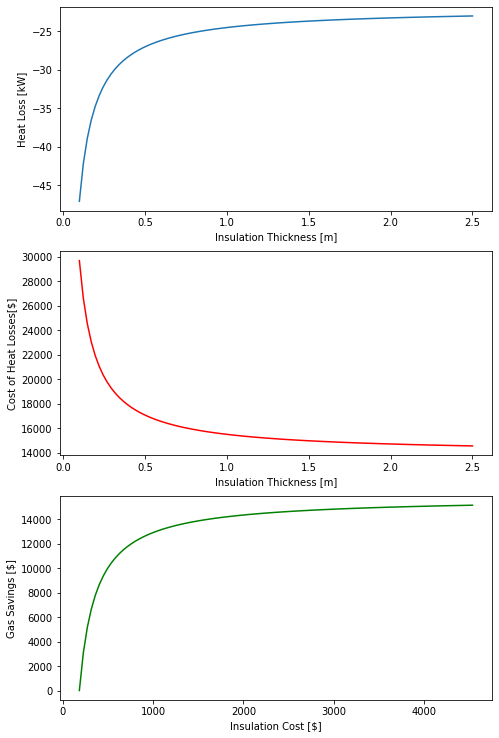

In [3]:
# Using values provided in Part 1 of this problem
D = 0.1
L = 25.
q = 18405.
h = 10.
T_infty = 25.
T_surface = 150
eps = 0.8
eta_f = 0.9
C = 0.02
A = np.pi*D*L

# new variables
k = 0.018 # thermal conductivity of insulation
s_year = 31557600 # number of seconds in a year
c_insul = 231.15  # 1 m^3 of insulation costs 231.15 dollars

# calculate energy loss [KW]
def energy_loss(L):
    return (q - h*A*(T_surface - T_infty) - eps*csts.sigma*A*(thermo.C2K(T_surface)**4 - thermo.C2K(T_infty)**4)
    - k*((T_surface - T_infty)/L))/eta_f

# calculate cost due to energy loss [$]
def calc_cost(energy_loss): # [$]
    return energy_loss*s_year/1000*C*-1

# define insulation thickness array [m]
thicknesses = np.linspace(0.1,2.5, 100)

# calculate energy losses, cost of insulation, gas savings due to insulation
energy_losses = []
cost_insulation = []
gas_savings = []
cost_wo_insulation = calc_cost(energy_loss(0.1))
for t in thicknesses:
    energy_losses.append(energy_loss(t))
    cost_insulation.append(A*t*c_insul)
    gas_savings.append(cost_wo_insulation - (calc_cost(energy_loss(t))))

# calculate cost due to energy loss
cost = [] # [$]
for e in energy_losses:
    cost.append(calc_cost(e))
    
# plot results
fig = plt.figure()
ax1 = fig.add_subplot(3,1,1)
plt.plot(thicknesses, energy_losses)
ax1.set_xlabel("Insulation Thickness [m]")
ax1.set_ylabel("Heat Loss [kW]")

ax2 = fig.add_subplot(3,1,2)
plt.plot(thicknesses, cost, color='r')
ax2.set_xlabel("Insulation Thickness [m]")
ax2.set_ylabel("Cost of Heat Losses[$]")

ax3 = fig.add_subplot(3,1,3)
plt.plot(cost_insulation, gas_savings, color='g')
ax3.set_xlabel("Insulation Cost [$]")
ax3.set_ylabel("Gas Savings [$]")

fig = plt.gcf()
fig.set_size_inches((7.75, 12.75), forward=False)
plt.show()

## 2 Window

Set up equations and apply realistic numerical values to them to discuss heat losses of a single pane window, a single pane window with storm window and a double paned window with air trapped at a vacuum of $10^{-3} \mathrm{torr}$ ina gap of $5\mathrm{mm}$. Do not consider the effects of radiation for any of the window.

### Solution

Assumptions:
* Heat transfer is steady and 1D
* Neglect radiation for all windows
* Neglect convection between glass panes
* The heat transfer coefficient, h, is the same for all terms, so it cancels. We don't know how to solve for this yet :(

* $L_{gap,st}$ = 1 in = 0.0254 m (air gap between storm window)
* $L_{gap,dp}$ = 5 mm = 0.005 m (air gap between double pane windows)
* $L_{glass}$ = 0.00238 m (glass thickness)

* $k_{air,dp}$ = 0.003 for air @ 10^-3 torr = 0.00133322368 barr (see provided chart)
* $k_{air,rt}$ = 0.02624 for air @ 25 C (inside temperature, storm window... see link 1)
* $k_{air,ot}$ = 0.02436 for air @ 0 C (see link 1)
* $k_{air,st}$ = 0.02531 for air @ 12.5 C (storm window... see link 1)
* $k_{glass}$ = 1.05 W/m.K (for glass... see link 2) 
* h = 10 (see link 3)

* $T_{in}$ = 25 C = 298.15 K
* $T_{out}$ = 0 C = 273.15 K
* $P_{dp} = 10^{-3}$ torr = 0.00133322368 mbar (air pressure inside the double pane window)
* $P_{ambient}$ = 1 atm

Link:
* 1. https://www.engineeringtoolbox.com/air-properties-viscosity-conductivity-heat-capacity-d_1509.html?vA=-5°ree=C&pressure=1bar#
* 2. https://www.engineeringtoolbox.com/thermal-conductivity-d_429.html
* 3. https://www.engineersedge.com/heat_transfer/convective_heat_transfer_coefficients__13378.htm

Derivations:

Consider a $\underline{\textbf{single plane window}}$. There is convection into the glass (from the room), then conduction through the glass and finally convection out of the glass (to the outside).

In [ ]:
R = []
R.append(res.Resistance(name="$R_{cond,i}$", units="W/m"))
R.append(res.Resistance(name="$R_{conv,g}$", units="W/m"))
R.append(res.Resistance(name="$R_{cond,o}$", units="W/m"))

d = schem.Drawing()
d.add(e.DOT, label = r"$T_{s,i}$")
R1 = d.add(e.RES, d = 'right', label = R[0].name)
d.add(e.DOT, label = r"$T_{glass}$")
R2 = d.add(e.RES, d = 'right', label = R[1].name)
d.add(e.DOT, label = r"$T_{s,o}$")
R3 = d.add(e.RES, d = 'right', label = R[2].name)
d.add(e.DOT, label = r"$T_{outside}$")
L1 = d.add(e.LINE, label="$q^{'}_{room}$", endpts = [[-2.25, 0], [-0.25, 0]])
d.labelI(L1, arrowofst = 0)
d.draw()

$$
E_{in} = E_{out}\\
q^{''}_{tot} = \frac{1}{R^{''}_{tot}}(T_{\infty,1}-T_{\infty,2}) \\
R^{''}_{tot} = R^{''}_{conv,1}+R^{''}_{cond,1}+R^{''}_{conv,2}\\
$$
The convective terms cancel because we assume h is constant.
$$
R^{''}_{cond,1} = \frac{L_{glass}}{k_{glass}}
$$


Consider a $\underline{\textbf{single pane with a storm window}}$. There is convection into the first glass pane (from the room), then conduction within the air gap. Then, there is conduction into the final storm window and convection out of the storm window (to the outside).

In [ ]:
R = []
R.append(res.Resistance(name="$R_{conv,i}$", units="W/m"))
R.append(res.Resistance(name="$R_{cond,a}$", units="W/m"))
R.append(res.Resistance(name="$R_{cond,g}$", units="W/m"))
R.append(res.Resistance(name="$R_{conv,o}$", units="W/m"))

d = schem.Drawing()
d.add(e.DOT, label = r"$T_{s,i}$")
R1 = d.add(e.RES, d = 'right', label = R[0].name)
d.add(e.DOT, label = r"$T_{air}$")
R2 = d.add(e.RES, d = 'right', label = R[1].name)
d.add(e.DOT, label = r"$T_{glass}$")
R3 = d.add(e.RES, d = 'right', label = R[2].name)
d.add(e.DOT, label = r"$T_{s,o}$")
R4 = d.add(e.RES, d = 'right', label = R[3].name)
d.add(e.DOT, label = r"$T_{outside}$")
L1 = d.add(e.LINE, label="$q^{'}_{room}$", endpts = [[-2.25, 0], [-0.25, 0]])
d.labelI(L1, arrowofst = 0)
d.draw()

$$
E_{in} = E_{out} \\
q^{''}_{tot} = \frac{1}{R^{''}_{tot}}(T_{\infty,1}-T_{\infty,4})\\
R^{''}_{tot} = R^{''}_{conv,1}+R^{''}_{cond,1}+R^{''}_{cond,2}+R^{''}_{cond,3}+R^{''}_{conv,4}\\
$$
The convective terms cancel because we assume h is constant.
$$
R^{''}_{tot} = R^{''}_{cond,1}+R^{''}_{cond,2}+R^{''}_{cond,3} \\
$$
The thermal resistance through the regular glass pane and the storm glass pane is the same.
$$
R^{''}_{tot} = 2\left(\frac{L_{glass}}{k_{glass}}\right) + \frac{L_{gap,st}}{k_{air,st}}
$$

Consider a $\underline{\textbf{double pane window with air-trapped}}$. There is convection through the first glass pane (from the room), then conduction within the pressurized air gap. Finally, there is conduction and convectin through the final window pane.

In [ ]:
R = []
R.append(res.Resistance(name="$R_{conv,i}$", units="W/m"))
R.append(res.Resistance(name="$R_{cond,a}$", units="W/m"))
R.append(res.Resistance(name="$R_{cond,g}$", units="W/m"))
R.append(res.Resistance(name="$R_{conv,o}$", units="W/m"))

d = schem.Drawing()
d.add(e.DOT, label = r"$T_{s,i}$")
R1 = d.add(e.RES, d = 'right', label = R[0].name)
d.add(e.DOT, label = r"$T_{air}$")
R2 = d.add(e.RES, d = 'right', label = R[1].name)
d.add(e.DOT, label = r"$T_{glass}$")
R3 = d.add(e.RES, d = 'right', label = R[2].name)
d.add(e.DOT, label = r"$T_{s,o}$")
R4 = d.add(e.RES, d = 'right', label = R[3].name)
d.add(e.DOT, label = r"$T_{outside}$")
L1 = d.add(e.LINE, label="$q^{'}_{room}$", endpts = [[-2.25, 0], [-0.25, 0]])
d.labelI(L1, arrowofst = 0)
d.draw()

$$
E_{in} = E_{out}\\
q^{''}_{tot} = \frac{1}{R^{''}_{tot}}(T_{\infty,1}-T_{\infty,4})\\
R^{''}_{tot} = R^{''}_{conv,1}+R^{''}_{cond,1}+R^{''}_{cond,2}+R^{''}_{cond,3}+R^{''}_{cond,4}+R^{''}_{cond,5}+R^{''}_{conv,6}\\
$$
The convective terms cancel because we assume h is constant.
$$
R^{''}_{tot} = R^{''}_{cond,1}+R^{''}_{cond,2}+R^{''}_{cond,3}+R^{''}_{cond,4}+R^{''}_{cond,5}\\
$$
The thermal resistance through each of the glass panes is the same.
$$
R^{''}_{tot} = 2\left(\frac{L_{glass}}{k_{glass}}\right) + \frac{L_{gap,dp}}{k_{air,dp}}
$$

In [19]:
# Calculate the values
L_glass = 0.00238 # [m]
k_glass = 1.05 # [W/m.K]
L_gap_st = 0.0254 # [m] 
k_air_st = 0.02531 # [W/m.K]
L_gap_dp = 0.005 # [m]
k_air_dp = 0.003 # [W/m.K]

# Calculate q'' for single pane window
r1 = L_glass/k_glass
print("The thermal resistance for a single pane window is " + str(round(r1,5)) +" W/K.")

# Calculate q'' for single pane with a storm window
r2 = 2*(L_glass/k_glass) + (L_gap_st/k_air_st)
print("The thermal resistance for a single pane window with a storm window is " + str(round(r2,5)) +" W/K.")

# Calculate q'' for double pane window with air-trapped
r3 = 2*(L_glass/k_glass) + (L_gap_dp/k_air_dp)
print("The thermal resistance for a double pane window with air-trapped is " + str(round(r3,5)) +" W/K.")


The thermal resistance for a single pane window is 0.00227 W/K.
The thermal resistance for a single pane window with a storm window is 1.00809 W/K.
The thermal resistance for a double pane window with air-trapped is 1.6712 W/K.


Since thermal a larger thermal resistance results in less heat transfer, we observe the expected result. The single pane window had the largest heat loss and the double pane window with pressurized air had the least heat loss.